<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/22e_New%EA%B2%8C%EC%9E%84%EA%B5%AC%EB%A7%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'mjkimcs'
os.environ['KAGGLE_KEY'] = '47adf959b8d9d52a7332fb2dff639854'

In [ ]:
!rm *.*
!kaggle datasets download -d rush4ratio/video-game-sales-with-ratings
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/476k [00:00<?, ?B/s]
100% 476k/476k [00:00<00:00, 47.9MB/s]
Archive:  video-game-sales-with-ratings.zip
  inflating: Video_Games_Sales_as_at_22_Dec_2016.csv  


In [ ]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## EDA


### 결손 데이터 제거 : dropna()


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


### 수치형 데이터의 히스토그램 확인


In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

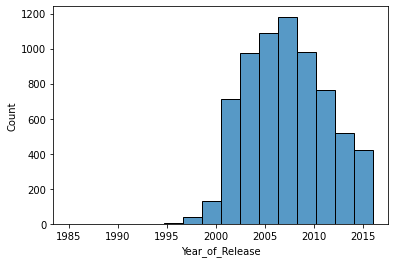

In [ ]:
sns.histplot(x='Year_of_Release', data=df, bins=16)

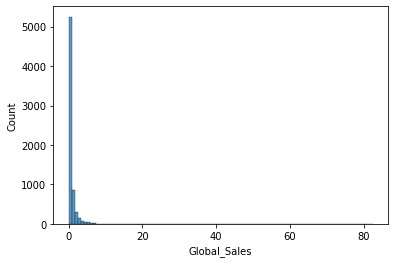

In [ ]:
sns.histplot(x='Global_Sales', data=df, bins=100)

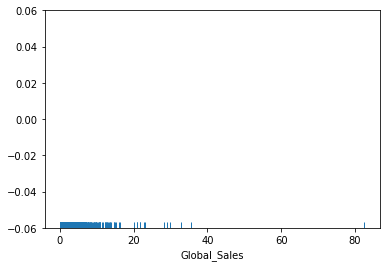

In [ ]:
sns.rugplot(x='Global_Sales', data=df)

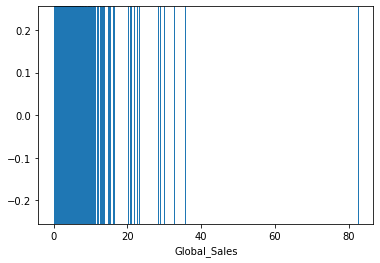

In [ ]:
sns.rugplot(x='Global_Sales', data=df, height=1)

In [ ]:
df[df['Global_Sales'] > 80]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


In [ ]:
df[df['Global_Sales'] > 30]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [ ]:
gs = df['Global_Sales'].quantile(0.99)
print(gs)

7.167600000000002


In [ ]:
df = df[df['Global_Sales'] < gs]

In [ ]:
df[df['Global_Sales'] > 80]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


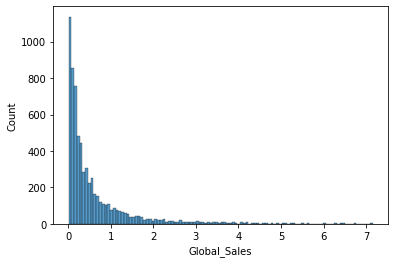

In [ ]:
sns.histplot(x='Global_Sales', data=df)

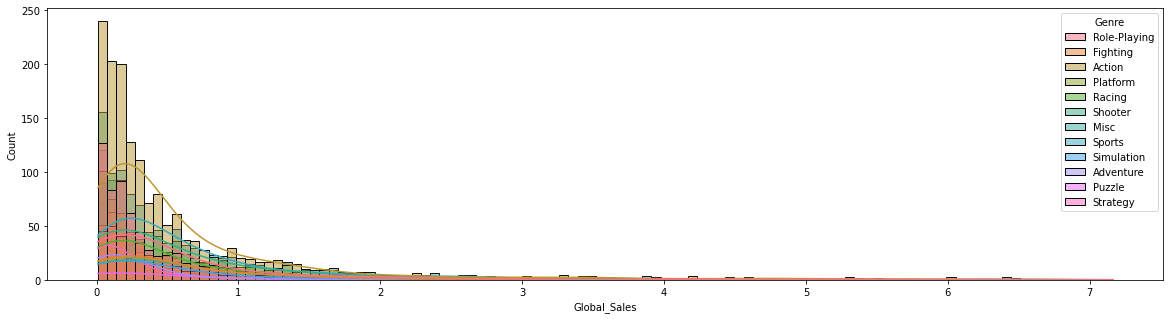

In [ ]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(x='Global_Sales', hue='Genre', kde=True, data=df)

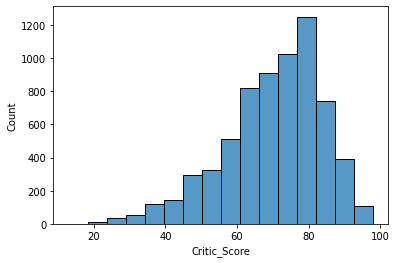

In [ ]:
sns.histplot(x='Critic_Score', data=df, bins=16)

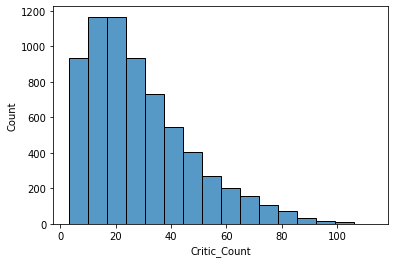

In [ ]:
sns.histplot(x='Critic_Count', data=df, bins=16)

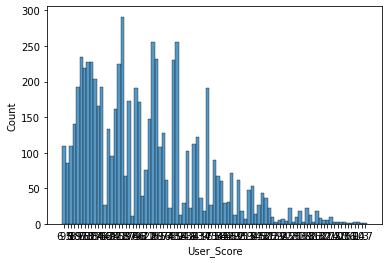

In [ ]:
sns.histplot(x='User_Score', data=df, bins=2) # string으로 인식하는 것으로 보임

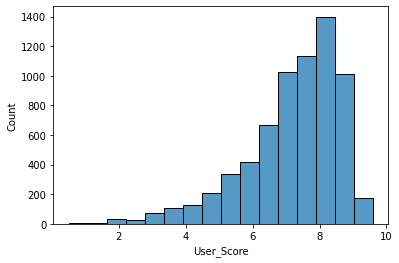

In [ ]:
sns.histplot(data=df['User_Score'].apply(float), bins=16)

In [ ]:
df['User_Score'] = df['User_Score'].apply(float)

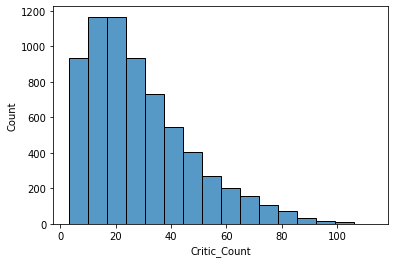

In [ ]:
sns.histplot(x='Critic_Count', data=df, bins=16)

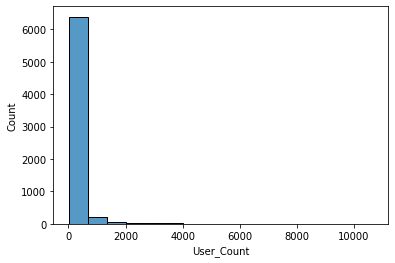

In [ ]:
sns.histplot(x='User_Count', data=df, bins=16)

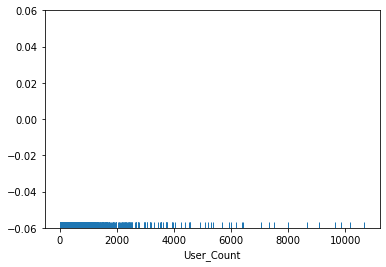

In [ ]:
sns.rugplot(x='User_Count', data=df)

In [ ]:
uc = df['User_Count'].quantile(0.99)
print(uc)

2454.8999999999996


In [ ]:
df = df[df['User_Count'] < uc]

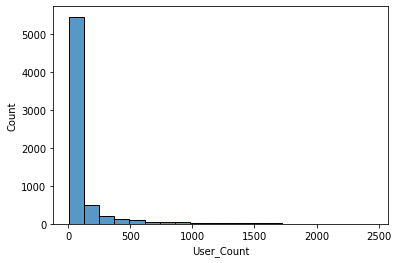

In [ ]:
sns.histplot(x='User_Count', data=df, bins=20)

In [ ]:
uc = df['User_Count'].quantile(0.97)
print(uc)

911.5599999999977


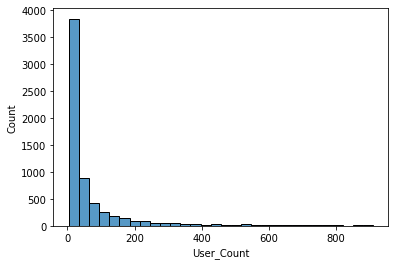

In [ ]:
df = df[df['User_Count'] < uc]
sns.histplot(x='User_Count', data=df, bins=30)

In [ ]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
106,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.0,15.0,9.1,367.0,Namco,T
109,Crash Bandicoot 3: Warped,PS,1998.0,Platform,Sony Computer Entertainment,3.68,1.75,1.42,0.28,7.13,91.0,12.0,8.9,432.0,Naughty Dog,E
111,Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,92.0,38.0,9.1,568.0,HAL Labs,T
113,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90,82.0,39.0,8.6,132.0,EA Canada,E
114,Medal of Honor: Frontline,PS2,2002.0,Shooter,Electronic Arts,2.93,2.75,0.17,0.99,6.83,88.0,29.0,8.5,135.0,EA LA,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


### 수치형 데이터와 전국 판매량의 Jointplot

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

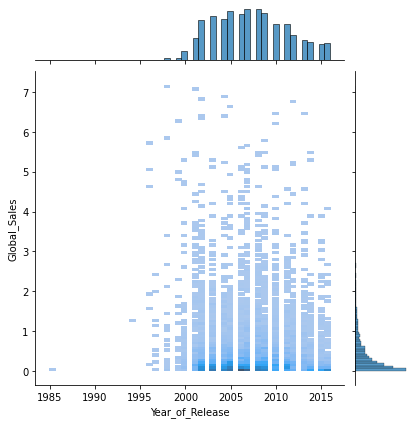

In [ ]:
sns.jointplot(x='Year_of_Release', y='Global_Sales', data=df, kind='hist')

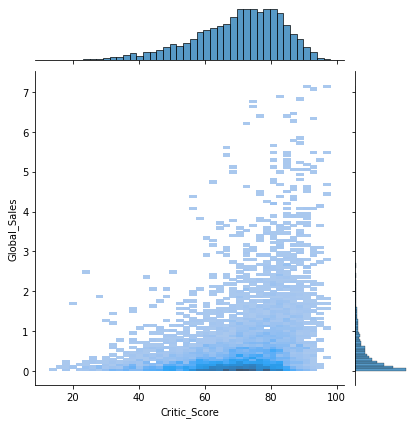

In [ ]:
sns.jointplot(x='Critic_Score', y='Global_Sales', data=df, kind='hist')

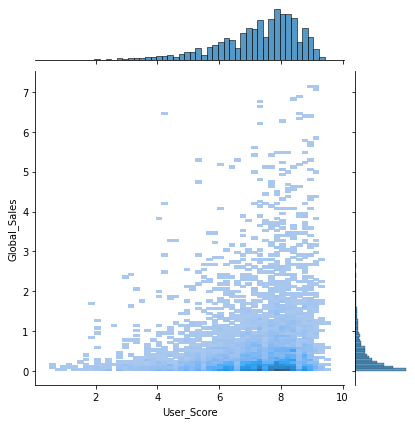

In [ ]:
sns.jointplot(x='User_Score', y='Global_Sales', data=df, kind='hist')

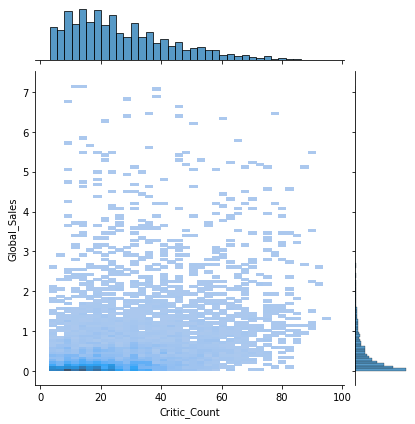

In [ ]:
sns.jointplot(x='Critic_Count', y='Global_Sales', data=df, kind='hist')

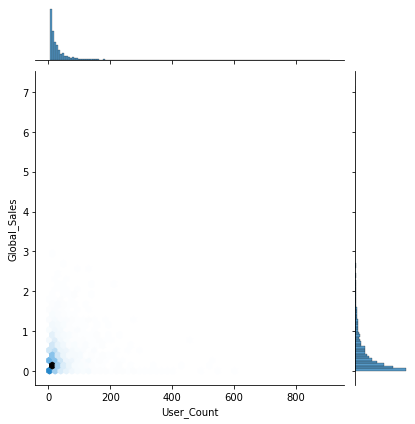

In [ ]:
sns.jointplot(x='User_Count', y='Global_Sales', data=df, kind='hex')

### 범주형 데이터와 전국 판매량의 Boxplot

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

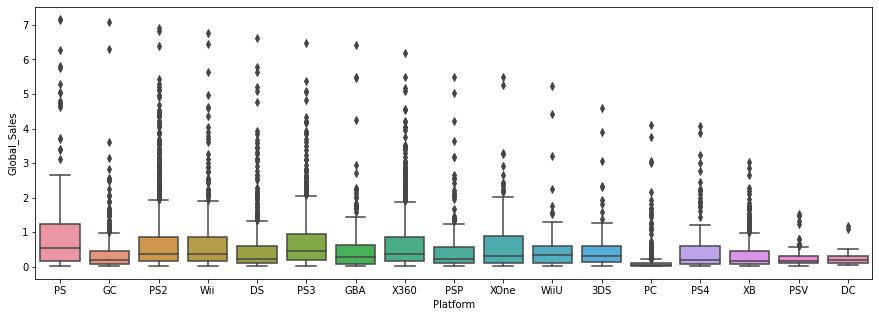

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Platform', y='Global_Sales', data=df)

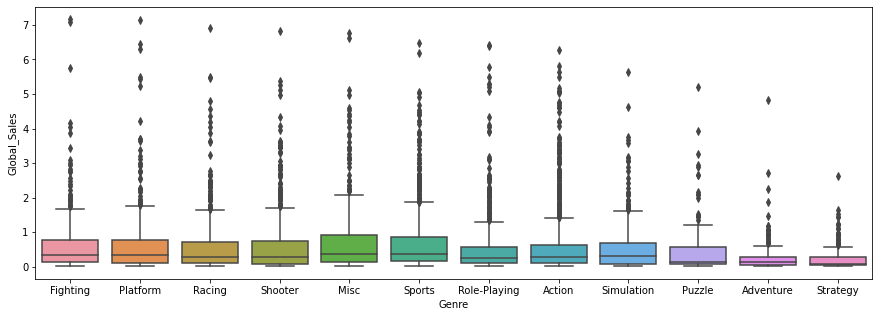

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Genre', y='Global_Sales', data=df)

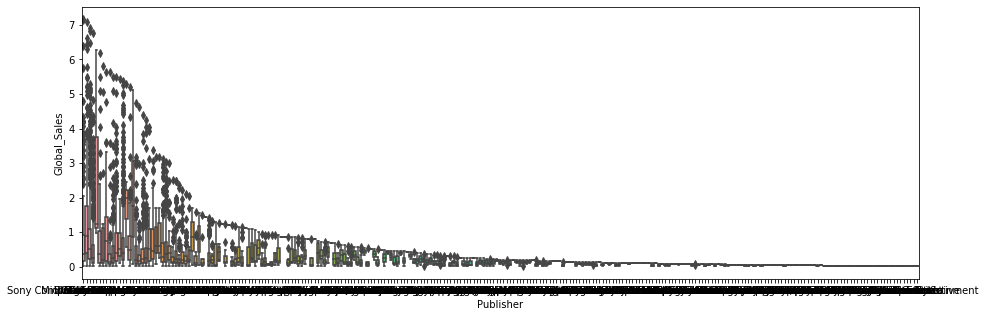

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Publisher', y='Global_Sales', data=df)

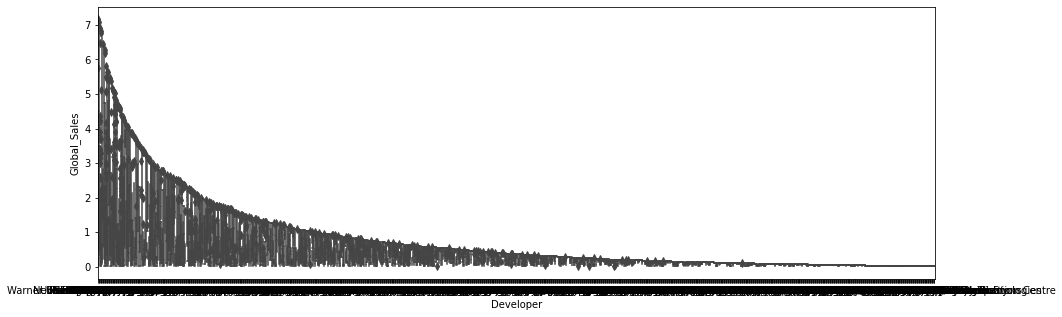

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Developer', y='Global_Sales', data=df)

### 전문가 평점과 사용자 평점의 차이 분석

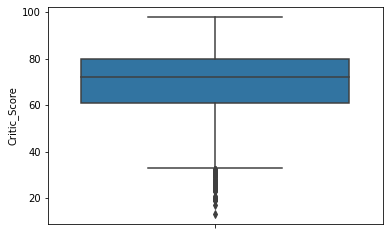

In [ ]:
sns.boxplot(y='Critic_Score', data=df)

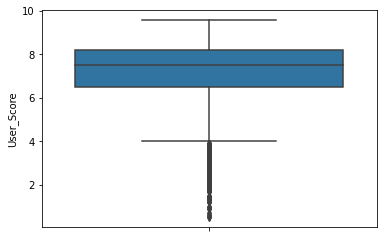

In [ ]:
sns.boxplot(y='User_Score', data=df)

In [ ]:
df['Critic_Score']

106      96.0
109      91.0
111      92.0
113      82.0
114      88.0
         ... 
16667    46.0
16677    81.0
16696    80.0
16700    61.0
16706    60.0
Name: Critic_Score, Length: 6487, dtype: float64

In [ ]:
type(df['Critic_Score'])

pandas.core.series.Series

In [ ]:
df[['Critic_Score']]

,Critic_Score
106,96.0
109,91.0
111,92.0
113,82.0
114,88.0
...,...
16667,46.0
16677,81.0
16696,80.0
16700,61.0


In [ ]:
type(df[['Critic_Score']])

pandas.core.frame.DataFrame

In [ ]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score': 'Score'}, axis=1, inplace=True) # 컬럼이름 바꾸기
critic_score

,Score
106,96.0
109,91.0
111,92.0
113,82.0
114,88.0
...,...
16667,46.0
16677,81.0
16696,80.0
16700,61.0


In [ ]:
critic_score['ScoreBy'] = 'Critics' # ScoreBy 컬럼 생성 후 값을 "Critics"라고 채워넣기
critic_score

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,46.0,Critics
16677,81.0,Critics
16696,80.0,Critics
16700,61.0,Critics


In [ ]:
user_score = df[['User_Score']]
user_score

,User_Score
106,9.1
109,8.9
111,9.1
113,8.6
114,8.5
...,...
16667,2.4
16677,8.8
16696,7.6
16700,5.8


In [ ]:
user_score = df[['User_Score']].copy() * 10
user_score

,User_Score
106,91.0
109,89.0
111,91.0
113,86.0
114,85.0
...,...
16667,24.0
16677,88.0
16696,76.0
16700,58.0


In [ ]:
user_score = df[['User_Score']].copy() * 10
user_score.rename({'User_Score': 'Score'}, axis=1, inplace=True)
user_score['ScoreBy'] = 'Users'

In [ ]:
scores = pd.concat([critic_score, user_score])
scores

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


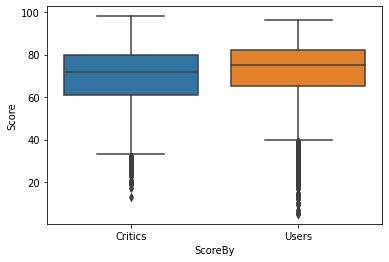

In [ ]:
sns.boxplot(x='ScoreBy', y='Score', data=scores)

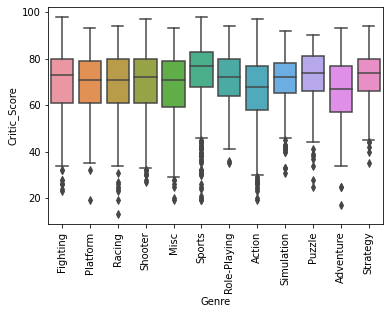

In [ ]:
sns.boxplot(x='Genre', y='Critic_Score', data=df)
plt.xticks(rotation=90)
plt.show()

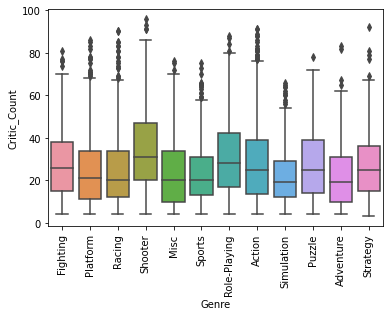

In [ ]:
sns.boxplot(x='Genre', y='Critic_Count', data=df)
plt.xticks(rotation=90)
plt.show()

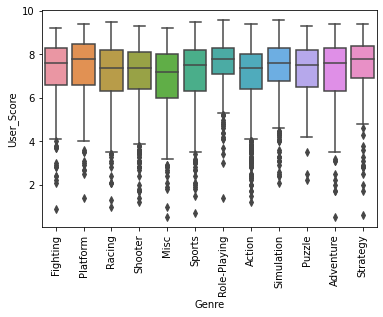

In [ ]:
sns.boxplot(x='Genre', y='User_Score', data=df)
plt.xticks(rotation=90)
plt.show()

### 수치형 데이터간의 상관성 시각화

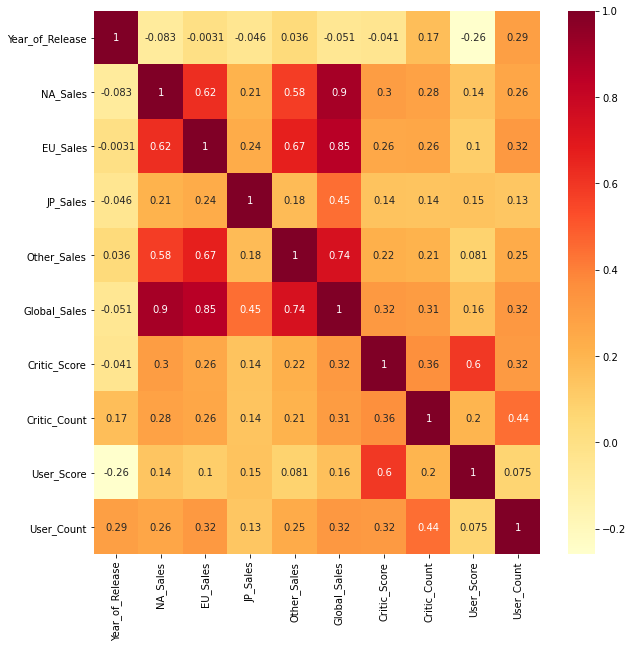

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd');

## 모델 학습을 위한 데이터 전처리 

### 범주형 데이터에서 소수 범주를 others로 대체

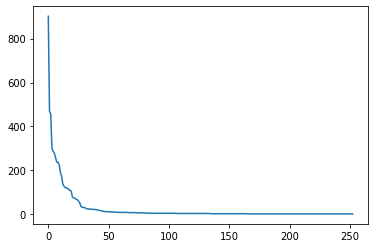

In [ ]:
p = df['Publisher'].value_counts()
plt.plot(range(len(p)), p)

In [ ]:
df['Publisher'] = df['Publisher'].apply(lambda s: s if s not in p[20:] else 'others')
p

others                                    1526
Electronic Arts                            902
Ubisoft                                    468
Activision                                 458
THQ                                        301
Sony Computer Entertainment                287
Sega                                       278
Nintendo                                   257
Konami Digital Entertainment               237
Take-Two Interactive                       237
Namco Bandai Games                         226
Capcom                                     190
Atari                                      174
Tecmo Koei                                 137
Square Enix                                127
Microsoft Game Studios                     121
Warner Bros. Interactive Entertainment     120
Eidos Interactive                          118
Codemasters                                111
Vivendi Games                              109
Midway Games                               103
Name: Publish

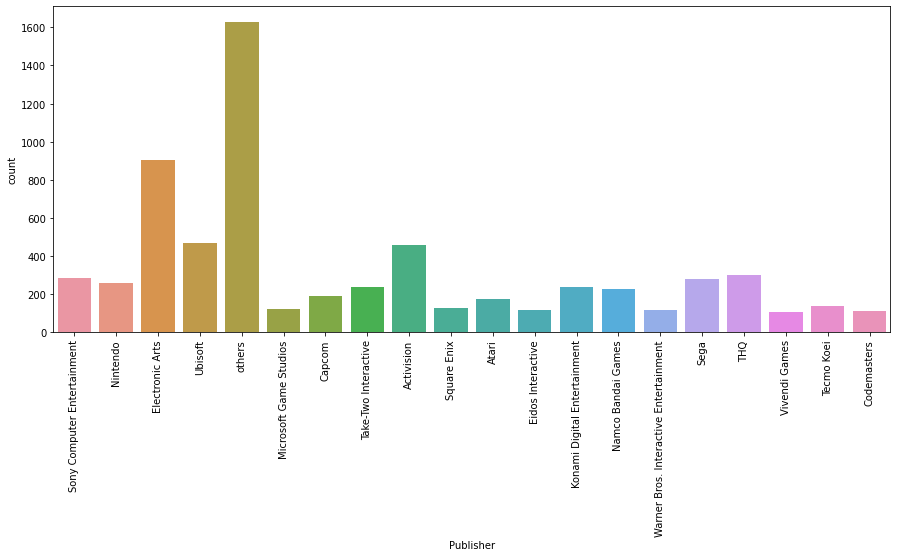

In [ ]:
fig = plt.figure(figsize=(15, 6))
sns.countplot(x='Publisher', data=df)
plt.xticks(rotation=90)
plt.show()

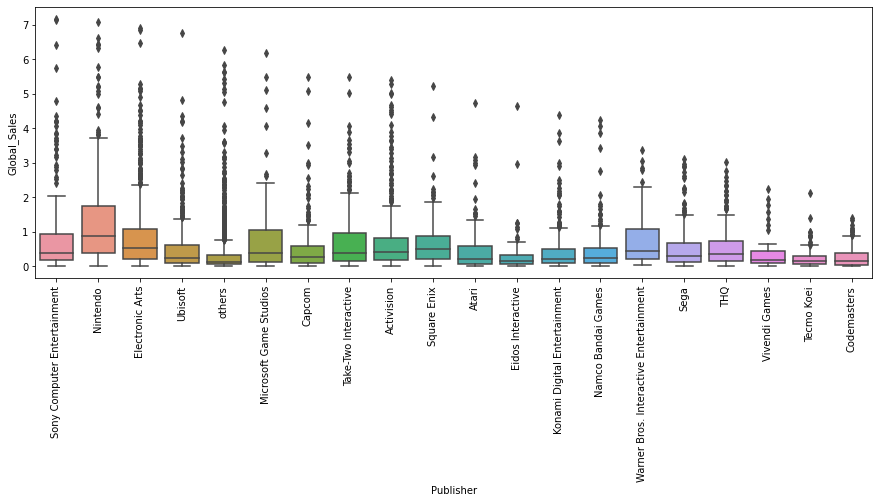

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Publisher', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
d = df['Developer'].value_counts()
plt.plot(range(len(d)), d)

In [ ]:
df['Developer'] = df['Developer'].apply(lambda s: s if s not in d[20:] else 'others')
d

others                            5038
EA Canada                          149
EA Sports                          140
Capcom                             122
Ubisoft                             96
Konami                              95
EA Tiburon                          82
Ubisoft Montreal                    74
Omega Force                         69
Visual Concepts                     68
Electronic Arts                     66
Traveller's Tales                   59
Vicarious Visions                   57
Codemasters                         57
Namco                               55
Yuke's                              48
Nintendo                            45
TT Games                            43
Midway                              42
Neversoft Entertainment             42
Eurocom Entertainment Software      40
Name: Developer, dtype: int64

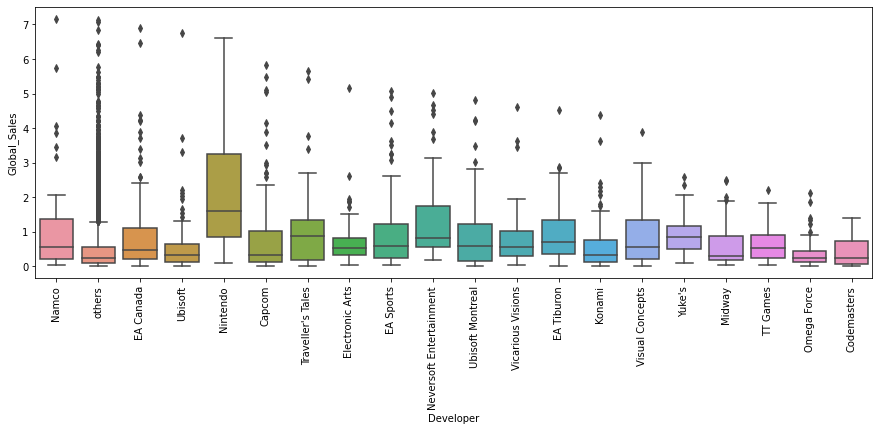

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Developer', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

### 범주형 데이터 전처리 : get_dummies

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
df[['Platform', 'Genre', 'Publisher']]

,Platform,Genre,Publisher
106,PS,Fighting,Sony Computer Entertainment
109,PS,Platform,Sony Computer Entertainment
111,GC,Fighting,Nintendo
113,PS2,Racing,Electronic Arts
114,PS2,Shooter,Electronic Arts
...,...,...,...
16667,GBA,Action,others
16677,GBA,Fighting,others
16696,PC,Action,Konami Digital Entertainment
16700,PC,Shooter,others


In [ ]:
X_cat = df[['Platform', 'Genre', 'Publisher']]
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Atari,Publisher_Capcom,Publisher_Codemasters,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Microsoft Game Studios,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
109,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16677,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16696,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16700,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Regression

### 모델의 입력과 출력 정의


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

In [ ]:
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Global_Sales']

In [ ]:
X.head()

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Atari,Publisher_Capcom,Publisher_Codemasters,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Microsoft Game Studios,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,-2.237912,1.944152,-0.704478,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
109,-2.237912,1.577371,-0.874440,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111,-1.514757,1.650727,0.598567,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,-0.791602,0.917163,0.655221,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,-1.273706,1.357302,0.088680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[02:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 모델 학습 결과 평가

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))

XGB MAE: 0.39798495746173185
XGB RMSE: 0.6831938334148185
LR MAE: 0.4434484417839641
LR RMSE: 0.7033022061263666


### 학습 결과 심화 분석


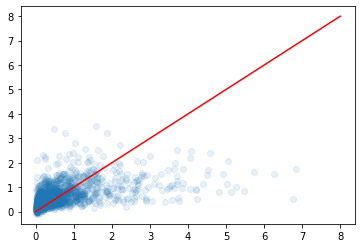

In [ ]:
# 실제값과 추측값의 Scatter plot
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([0, 8], [0,8], 'r-')

# 판매량이 많은 것은 대체로 아웃라이어에 속해있어서, 판매량이 많은 쪽은 잘 예측을 못함

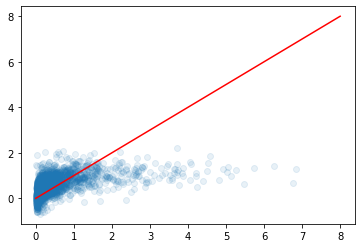

In [ ]:
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0, 8], [0,8], 'r-')

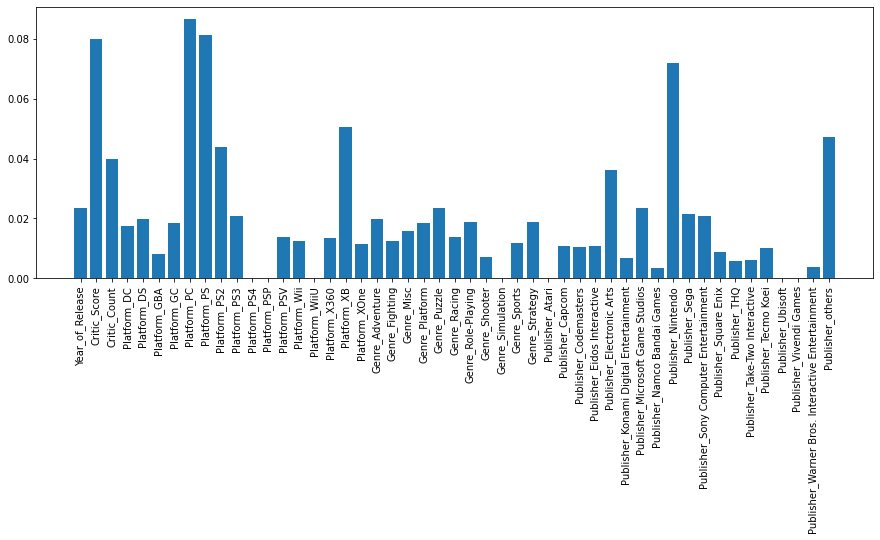

In [ ]:
# XGBoost의 Feature Importance
fig = plt.figure(figsize=(15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
model_xgb.feature_importances_

array([0.02346557, 0.07996131, 0.03981544, 0.01734816, 0.01996875,
       0.00824439, 0.01845174, 0.08644966, 0.08125196, 0.04387   ,
       0.02093342, 0.        , 0.        , 0.01374962, 0.01241046,
       0.        , 0.01347464, 0.050414  , 0.01157084, 0.01964298,
       0.012342  , 0.0159334 , 0.01852414, 0.02349916, 0.01379815,
       0.01872343, 0.00719119, 0.00020656, 0.0116804 , 0.01877483,
       0.        , 0.01084653, 0.01048649, 0.01077022, 0.0362171 ,
       0.00683715, 0.02352061, 0.00360357, 0.07205867, 0.02147847,
       0.02076733, 0.00889593, 0.00565455, 0.00620092, 0.01000235,
       0.        , 0.        , 0.00370171, 0.04726216], dtype=float32)

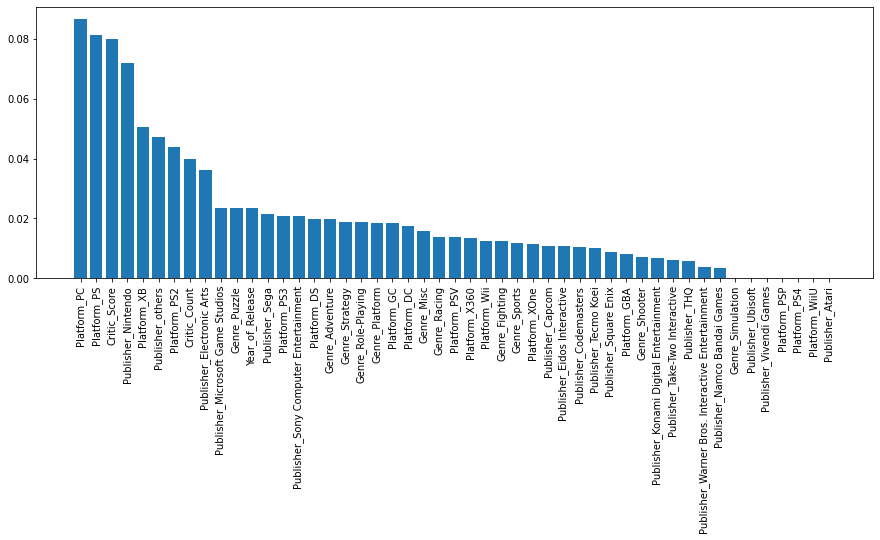

In [ ]:
fig = plt.figure(figsize=(15,5))

model_imp = pd.DataFrame(data=model_xgb.feature_importances_, index=X.columns, columns=['Imp'])
model_imp.sort_values(by='Imp', ascending=False, inplace=True)
plt.bar(model_imp.index,model_imp['Imp'])

plt.xticks(rotation=90)
plt.show()

## 유저 평점 Regression

### 입출력 정의

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

In [ ]:
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['User_Score']

In [ ]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### XGBoost

In [ ]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[03:41:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Linear Regression

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))

XGB MAE: 0.7416907413102568
XGB RMSE: 1.0142648909482925
LR MAE: 0.779981609380737
LR RMSE: 1.0532387308539637


### 심화분석


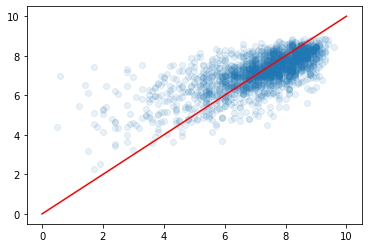

In [ ]:
# 실제값과 추측값의 Scatter plot
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([0, 10], [0,10], 'r-')

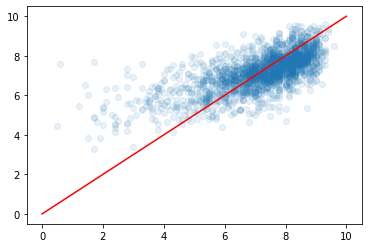

In [ ]:
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0, 10], [0,10], 'r-')

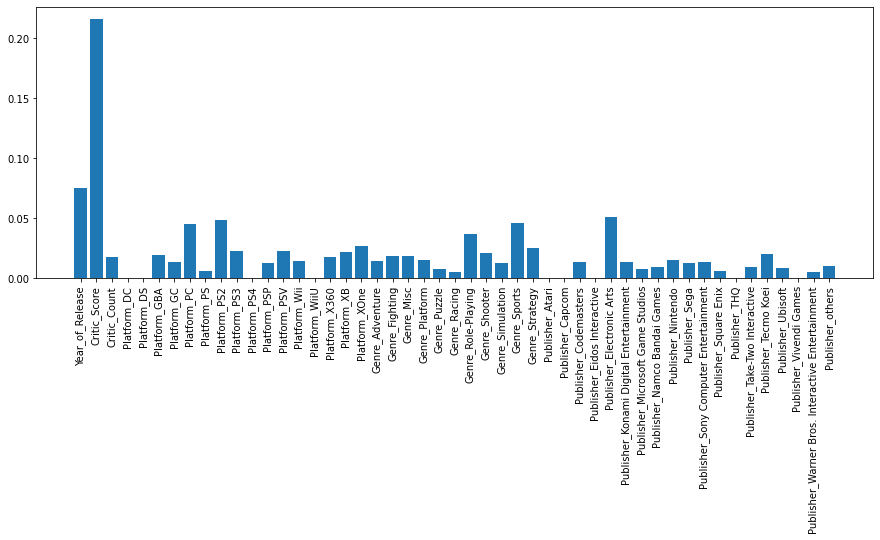

In [ ]:
# XGBoost의 Feature Importance
fig = plt.figure(figsize=(15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

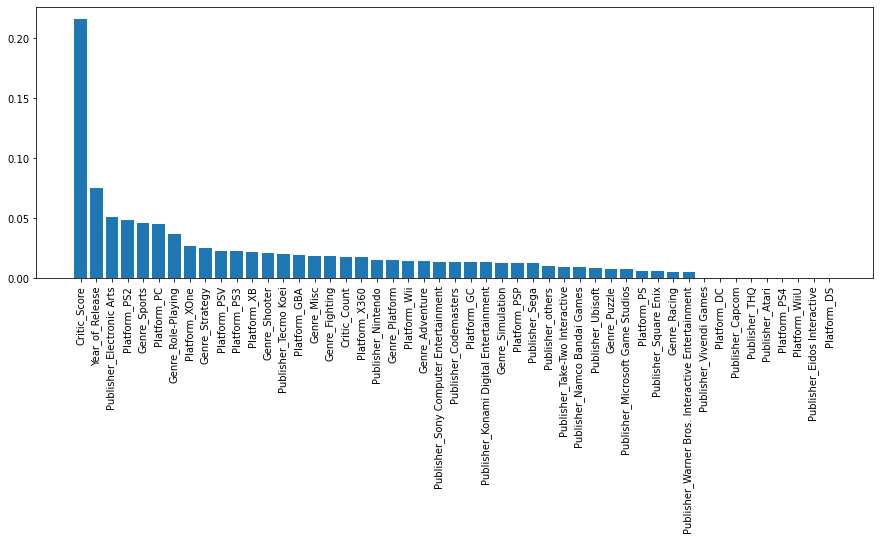

In [ ]:
fig = plt.figure(figsize=(15,5))

model_imp = pd.DataFrame(data=model_xgb.feature_importances_, index=X.columns, columns=['Imp'])
model_imp.sort_values(by='Imp', ascending=False, inplace=True)
plt.bar(model_imp.index,model_imp['Imp'])

plt.xticks(rotation=90)
plt.show()